# Non-Contextual Image Segmentation

Let's begin our discussion on traditional techniques from non-contextual ones. These set of techniques basically focus on applying a criterion on an image which split the image into two or more segments. This criterion which is applied to the images is defined by a global value defined on an image level.

It is worth noting that non-contextual refers to the techniques not taking any spatial information or spatial relations between pixels into context.

Let's look at some techniques of segmenting images using thresholding and clustering methods.

## Thresholding - Segmenting by logical condition

Let's look at a simple grayscale image to understand how we can apply image thresholding to segment it.

In [1]:
# importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# reading image using opencv

name = 'image-1'
image = cv2.imread('eren.jpg'.format(name))
print('Image matrix shape {}'.format(image.shape))

Image matrix shape (1080, 1080, 3)


In [4]:
# image plotting helper functions

def rowPlot(images, subtitles, title):
    
    f, ax = plt.subplots(1, len(images), figsize = (5*len(images), 5))
    for i, (x, im) in enumerate(zip(ax, images)):
        if(len(im.shape) == 3):
            x.imshow(im)
        else:
            x.imshow(im, cmap = 'gray')
        x.set_title(subtitles[i])
        x.axis('off')

    f.suptitle(title)
    plt.show()

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print('Image matrix shape {}'.format(image_g.shape))

Image matrix shape (1080, 1080)


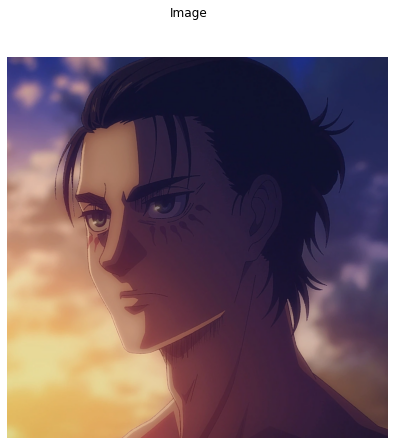

In [6]:
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.imshow(image)
ax.axis('off')
plt.suptitle('Image')
plt.show()

In [7]:
# function to perform simple thresholding

def simple_thresholding1(img, thr):
    
    img_t = np.where(img >= thr, 255, 0)
    
    return img_t

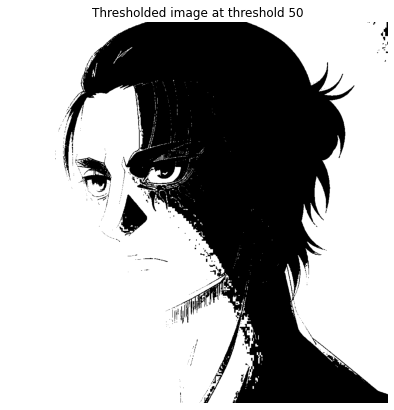

False

In [8]:
thr = 50
image_th1 = simple_thresholding1(image_g, thr)

f, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.axis('off')
plt.imshow(image_th1, cmap = 'gray')
plt.title('Thresholded image at threshold {}'.format(thr))
plt.show()

cv2.imwrite('..//assets//traditional_segmentation//{}_seg_{}.jpg'.format(name, thr), image_th1)

In [9]:
# function to print histogram of an image

def image_hist(img):
    
    if len(img.shape) == 3:
        f, ax = plt.subplots(1, 3, figsize = (20, 5))
        ax[0].plot(cv2.calcHist([img[:, :, 0]],[0],None,[256],[0,256]), color = 'red')
        ax[1].plot(cv2.calcHist([img[:, :, 0]],[0],None,[256],[0,256]), color = 'green')
        ax[2].plot(cv2.calcHist([img[:, :, 0]],[0],None,[256],[0,256]), color = 'blue')
        plt.show()
    else:
        f, ax = plt.subplots(1, 1, figsize = (20, 5))
        ax.plot(cv2.calcHist([img[:, :]],[0],None,[256],[0,256]), color = 'black')
    plt.title('Image Histogram')
    plt.ylabel('Counts')
    plt.xlabel('Intensity Level')
    plt.show()

# function to perform simple thresholding operation with two threshold values

def simple_thresholding2(img, thr1, thr2):
    
    img_t = np.where(img >= thr2, 255, np.where(img >= thr1, 125, 0))
    
    return img_t

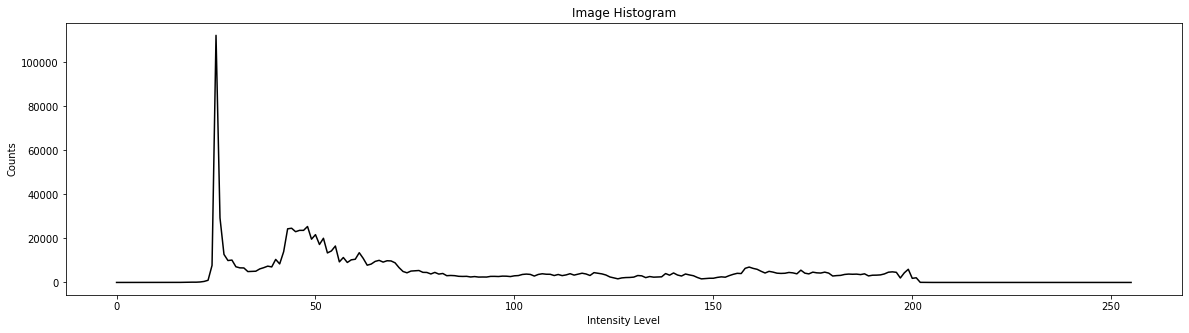

In [10]:
image_hist(image_g)

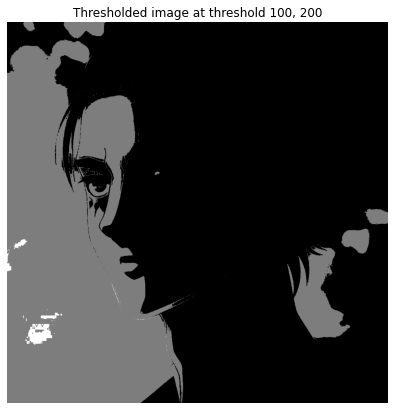

In [11]:
t1, t2 = 100, 200
image_th1 = simple_thresholding2(image_g, t1, t2)
f, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.axis('off')
plt.imshow(image_th1, cmap = 'gray')
plt.title('Thresholded image at threshold {}, {}'.format(t1, t2))
plt.show()

In [12]:
from ipywidgets import interact, widgets

interactive(children=(IntSlider(value=1, description='threshold', max=250, step=2), Output()), _dom_classes=('…

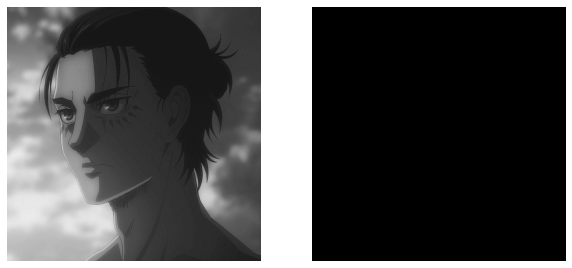

In [13]:
def plot_thr(threshold):
    image_th1 = simple_thresholding1(image_g, threshold)
    ax[1].imshow(image_th1, cmap="gray")
    f.canvas.draw()
    display(f)

f, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].imshow(image_g, cmap="gray")
ax[1].imshow(image_g, cmap="gray")

ax[0].axis('off')
ax[1].axis('off')

interact(plot_thr, threshold=widgets.IntSlider(min=0,max=250,step=2,value=1));

### Simple Thresholding Techniques in OpenCV

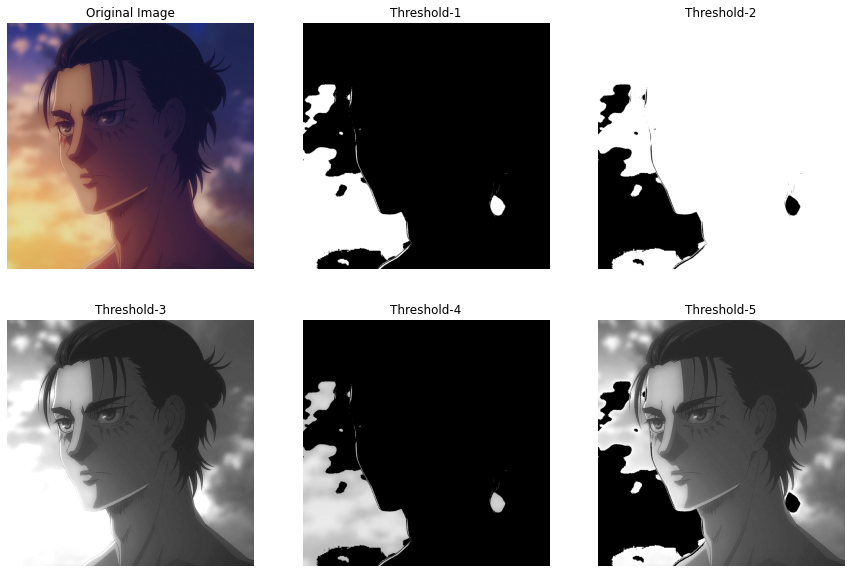

In [23]:
ret,thresh1 = cv2.threshold(image_g, 160, 235, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(image_g, 160, 235, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(image_g, 160, 235, cv2. THRESH_TRUNC)
ret,thresh4 = cv2.threshold(image_g, 160, 235, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(image_g, 160, 235, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','Threshold-1','Threshold-2','Threshold-3','Threshold-4','Threshold-5']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]

f, ax = plt.subplots(2, 3, figsize = (15, 10))
for i in range(2):
    for j in range(3):
        ax[i][j].imshow(images[3*i+j],'gray')
        ax[i][j].set_title(titles[3*i+j])
        ax[i][j].axis('off')

plt.show()

### Adaptive Thresholding Techniques in OpenCV
The codeline to apply the adaptive thresholding.

th2 = cv2.adaptiveThreshold(image_source,max_value,adaptive_method,threshold_type,block_size,constant)
    

interactive(children=(IntSlider(value=11, description='size', max=1079, min=11, step=2), Output()), _dom_class…

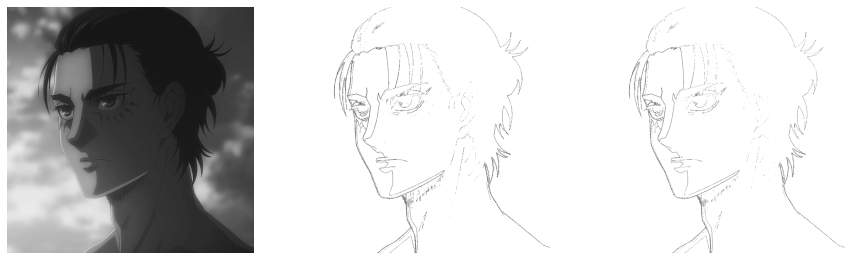

In [31]:
def plot_thr(size):
    th2 = cv2.adaptiveThreshold(image_g,255, cv2.ADAPTIVE_THRESH_MEAN_C ,cv2.THRESH_BINARY,3,5) # Complete
    th3 = cv2.adaptiveThreshold(image_g,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,5) # Complete
    
    ax[1].imshow(th2, cmap="gray")
    ax[2].imshow(th3, cmap="gray")
    f.canvas.draw()
    display(f)

f, ax = plt.subplots(1, 3, figsize = (15, 5))

ax[0].imshow(image_g, cmap="gray")
ax[1].imshow(image_g, cmap="gray")
ax[2].imshow(image_g, cmap="gray")

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

interact(plot_thr, size=widgets.IntSlider(min=11,max=min(image_g.shape[0], image_g.shape[1]) - 1,step=2,value=1));

## A More Analytical Method To Segment Image using Thresholding

We have seen that different values of threshold yield different results. Thus we need to find out that value of threshold which will yield the best result.

This brings up a point about how should we evaluate which segmented image is better. We refer back to  Pavlidis's definition to derive the criterion for evaluating a better segmentation. A criterion to evaluate the quality of segmented images is the __sum of class variances__.

_intra class variance = square of sum of (pixel intensity - mean pixel intensity of the class) / number of pixels in the class_

_sum of intra class variances = sum of (intra class variance) for each class_

Let's write some code to see if we can visualize what we have conceptualized.

### How Does Intra-Class Variance Vary for Different Thresholds

In [32]:
img_hist = cv2.calcHist([image_g], [0], None, [256], [0,256])

In [33]:
def class_variance(hist, lower, upper):
    
    class_data = hist[lower:upper]
    weight = sum(class_data)/sum(hist)
    intensities = np.arange(lower, upper)
    weighted_sum = class_data.T*intensities.T
    if sum(class_data) == 0:
        mu = 0
        sigma2 = 0
    else:
        mu = sum(weighted_sum[0])/sum(class_data)[0]
        deviations2 = (class_data - mu).T*(class_data - mu).T
        sigma2 = sum((deviations2*intensities.T)[0])/sum(class_data)[0]
    
    
    return mu, sigma2

sigmas = []
n = sum(img_hist)
for i in range(1, 255):
    _, s1 = class_variance(img_hist, 0, i)
    _, s2 = class_variance(img_hist, i, 256)
    sigma = sum(img_hist[0:i])*s1/n + sum(img_hist[i:256])*s2/n
    sigmas.append(sigma[0])

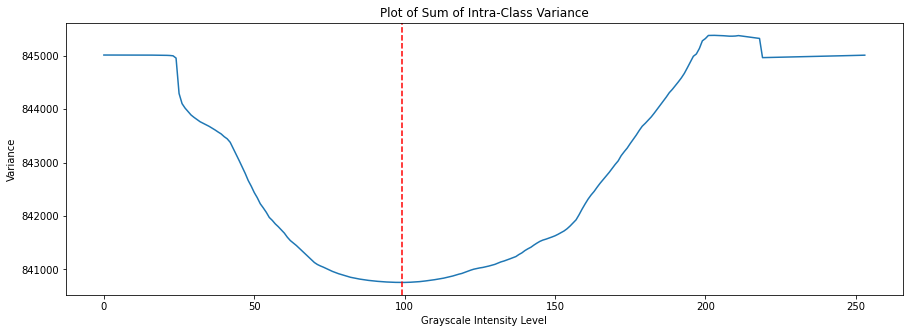

In [34]:
f, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(sigmas)
ax.axvline(x=np.argmin(sigmas), color='r', linestyle='--')
plt.title('Plot of Sum of Intra-Class Variance')
plt.xlabel('Grayscale Intensity Level')
plt.ylabel('Variance')
plt.show()

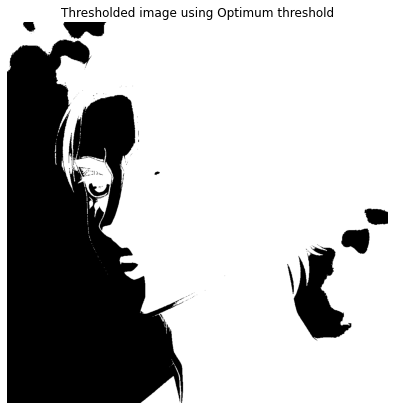

In [35]:
image_th = simple_thresholding1(image_g, np.argmin(sigmas))
image_th = 255 - image_th
f, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.axis('off')
plt.imshow(image_th, cmap = 'gray')
plt.title('Thresholded image using Optimum threshold'.format(np.argmin(sigmas)))
plt.show()

In [36]:
cv2.imwrite('..//assets//traditional_segmentation//{}_otsu_threshold.jpg'.format(name), image_th)

False

### What we have just discussed is called "Otsu's Method for Thresholding"

In [39]:
# reading image using opencv

name = 'image-1'
image = cv2.imread('eren.jpg'.format(name))
print('Image matrix shape {}'.format(image.shape))

Image matrix shape (1080, 1080, 3)


In [40]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print('Image matrix shape {}'.format(image_g.shape))

Image matrix shape (1080, 1080)


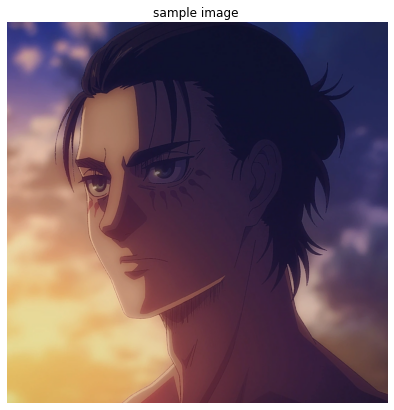

In [42]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.imshow(image)
plt.axis('off')
plt.title('sample image ')
plt.show()

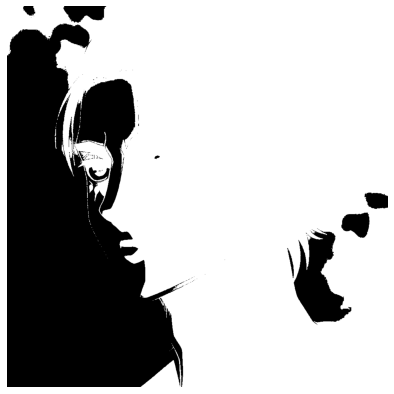

Otsu's Threshold 99


In [43]:
def otsu_thresholding(image_g):
    
    img_hist = cv2.calcHist([image_g], [0], None, [256], [0,256])
    sigmas = []
    n = sum(img_hist)
    for i in range(1, 255):
        _, s1 = class_variance(img_hist, 0, i)
        _, s2 = class_variance(img_hist, i, 256)
        sigma = sum(img_hist[0:i])*s1/n + sum(img_hist[i:256])*s2/n
        sigmas.append(sigma[0])

    image_th = simple_thresholding1(image_g, np.argmin(sigmas))
    image_th = 255 - image_th
    f, ax = plt.subplots(1, 1, figsize = (7, 7))
    ax.axis('off')
    plt.imshow(image_th, cmap = 'gray')
    plt.show()
    
    print('Otsu\'s Threshold {}'.format(np.argmin(sigmas)))
    
    return image_th

image_th = otsu_thresholding(image_g)

## Clustering - Segmenting by a distance criteria

In [44]:
import pandas as pd
from sklearn.cluster import KMeans

In [45]:
def cluster_image(img, k = 3):
    
    image_data = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
    imdf = pd.DataFrame(data = image_data, columns = ['r', 'g', 'b'])
    
    kmeans = KMeans(k)
    kmeans.fit(imdf)
    
    imdf.loc[:, 'cluster'] = kmeans.labels_   
    
    clustermeans = pd.DataFrame(data = kmeans.cluster_centers_, columns = ['rc', 'gc', 'bc'])
    clustermeans.loc[:, 'cluster'] = clustermeans.index
    
    mergedf = imdf.merge(clustermeans, on = 'cluster', how = 'left')
    
    image_cl = mergedf[['rc', 'gc', 'bc']].values.reshape(image.shape[0], image.shape[1], image.shape[2])
    
    print('Cluster centers = \n {}'.format(clustermeans))
    
    return image_cl

In [46]:
image_2 = cluster_image(image, k = 2)
image_3 = cluster_image(image, k = 3)
image_4 = cluster_image(image, k = 4)
image_5 = cluster_image(image, k = 5)
image_6 = cluster_image(image, k = 6)

c:\Users\91965\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers = 
            rc          gc          bc  cluster
0   56.877592   39.330828   68.487413        0
1  201.919079  160.918691  123.859438        1


c:\Users\91965\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers = 
            rc          gc          bc  cluster
0   45.254354   32.278071   63.514533        0
1  217.622524  177.538213  128.589251        1
2  124.204721   84.567272   97.053549        2


c:\Users\91965\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers = 
            rc          gc          bc  cluster
0   30.671241   25.926182   57.894363        0
1  152.620036  110.448689  112.244772        1
2  223.162285  184.171424  129.897666        2
3   79.819999   49.555732   75.998777        3


c:\Users\91965\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers = 
            rc          gc          bc  cluster
0  169.426995  123.799719  114.547445        0
1   57.719970   39.378510   72.748080        1
2   20.806724   18.946315   47.389290        2
3  225.913116  187.950973  130.554062        3
4  106.899231   69.048496   88.786315        4


c:\Users\91965\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers = 
            rc          gc          bc  cluster
0   55.900846   38.919334   72.601442        0
1  226.096742  188.238593  130.599917        1
2  108.695840   59.888382   68.704622        2
3   20.625990   18.866928   47.308679        3
4  172.944538  125.620037  112.000803        4
5   96.830481   82.202068  129.837241        5


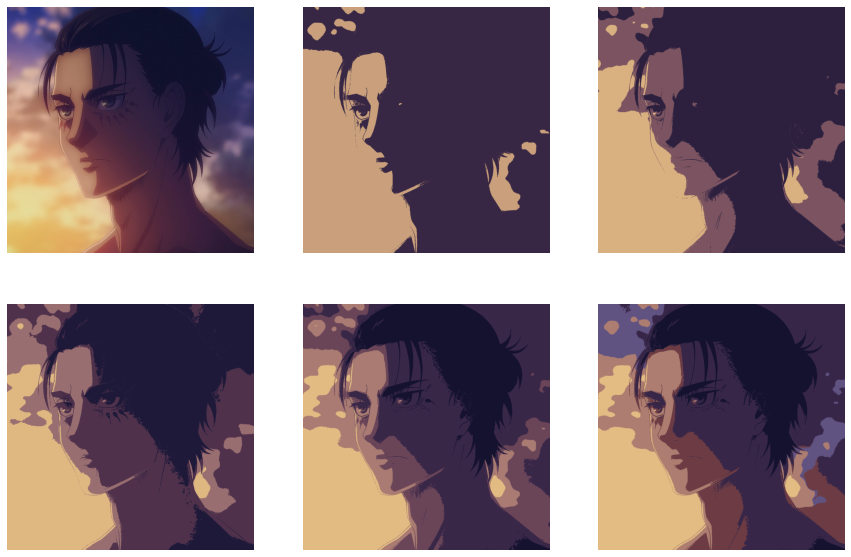

In [47]:
f, ax = plt.subplots(2, 3, figsize = (15, 10))

ax[0][0].imshow(image)
ax[0][1].imshow(image_2/255)
ax[0][2].imshow(image_3/255)
ax[1][0].imshow(image_4/255)
ax[1][1].imshow(image_5/255)
ax[1][2].imshow(image_6/255)

for x in ax:
    for y in x:
        y.axis('off')
    
plt.show()

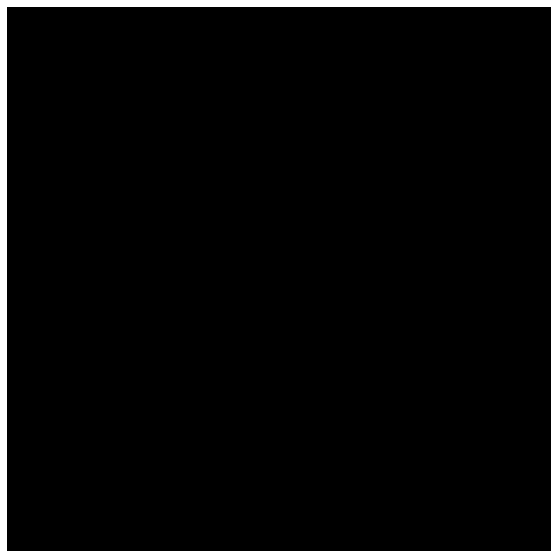

In [48]:
final = np.where((image_6[:, :, 2] > 150) & (image_6[:, :, 1] < 100) & (image_6[:, :, 0] < 100), 255,
                 np.where((image_6[:, :, 2] < 100) & (image_6[:, :, 1] > 100) & (image_6[:, :, 0] < 100), 125, 0))
f, ax = plt.subplots(1, 1, figsize = (10, 10))
plt.imshow(final, cmap = 'gray')
ax.axis('off')
plt.show()

It is worth noting that we can improve the output using **morphological techniques** which we learnt in the previous sessions

In [49]:
cv2.imwrite('..//assets//traditional_segmentation//{}_kmeans_output.jpg'.format(name), final)

False

### Let's also see how can these techniques be used together

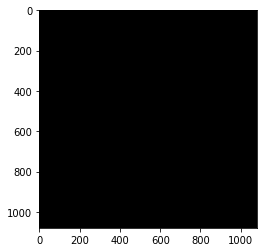

In [50]:
image_6_ = np.where((image_6[:, :, 2] > 150) & (image_6[:, :, 1] < 100) & (image_6[:, :, 0] < 100), 0,
                    np.where((image_6[:, :, 2] < 100) & (image_6[:, :, 1] > 100) & (image_6[:, :, 0] < 100), 125, 255)).astype(np.uint8)
plt.imshow(image_6_, cmap = 'gray')
plt.show()

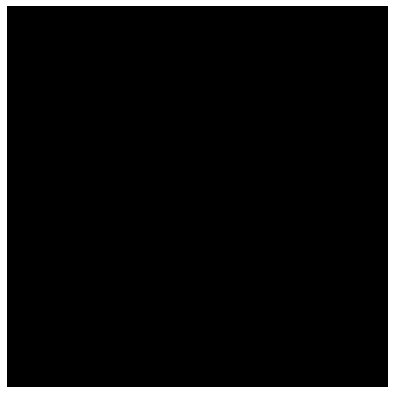

Otsu's Threshold 252


In [51]:
image_th = otsu_thresholding(image_6_)

In [ ]:
cv2.imwrite('..//assets//traditional_segmentation//{}_otsu_thresh.jpg'.format(name), image_th)

True